<a href="https://colab.research.google.com/github/cij1012/pytorch/blob/cij1012-pytorch1/3-min-pytorch_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [2]:
import torch.autograd

In [3]:
import torch.nn

In [4]:
import torch.optim
import torch.utils.data
import torch.onnx

In [5]:
x = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
print(x)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [6]:
print(x.size(), x.shape, x.ndimension())

torch.Size([3, 3]) torch.Size([3, 3]) 2


In [7]:
x = torch.unsqueeze(x, 0)
print(x)

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])


In [8]:
print(x.size(), x.shape, x.ndimension())

torch.Size([1, 3, 3]) torch.Size([1, 3, 3]) 3


In [9]:
x = x.view(9)
print(x)
print(x.size(), x.shape, x.ndimension())

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
torch.Size([9]) torch.Size([9]) 1


In [10]:
x = x.view(3,1,3)
print(x)

tensor([[[1, 2, 3]],

        [[4, 5, 6]],

        [[7, 8, 9]]])


In [11]:
w = torch.randn(5,3, dtype=torch.float)
x = torch.tensor([[1.0,2.0],[3.0,4.0],[5.0,6.0]])
print(w.size())
print(x.size())
print(w)
print(x)

torch.Size([5, 3])
torch.Size([3, 2])
tensor([[-1.6661, -0.1910, -0.6272],
        [ 0.0698,  0.1292,  0.1734],
        [-0.5938,  0.0031, -0.4160],
        [ 1.6206,  0.2199,  0.3856],
        [-0.3858, -0.7290,  1.4936]])
tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])


In [12]:
b = torch.randn(5,2, dtype=torch.float)
print(b)

tensor([[-0.9104,  0.7402],
        [ 0.2231,  0.4357],
        [ 0.2852,  0.2131],
        [ 1.4725, -0.6510],
        [ 0.9430,  1.7382]])


In [13]:
# 행렬곱  (5,3) * (3,2) = (5,2)
wx = torch.mm(w,x)
print(wx)
print(wx.size())

tensor([[-5.3754, -7.8598],
        [ 1.3242,  1.6965],
        [-2.6644, -3.6711],
        [ 4.2083,  6.4344],
        [ 4.8953,  5.2741]])
torch.Size([5, 2])


In [14]:
# 행렬간의 합
result = wx + b
print(result.size())
print(result)

torch.Size([5, 2])
tensor([[-6.2859, -7.1196],
        [ 1.5473,  2.1322],
        [-2.3792, -3.4580],
        [ 5.6808,  5.7835],
        [ 5.8383,  7.0124]])


In [15]:
# Auto grad
w = torch.tensor(1.0, requires_grad=True)

In [16]:
a = w*3

In [17]:
l = a**2

In [18]:
l.backward()
print('l을 w로 미분한 값은 {}'.format(w.grad))

l을 w로 미분한 값은 18.0


In [21]:
# 간단한 분류 모델
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [20]:
n_dim = 2
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim,
                              centers=[[1,1],[-1,-1],[1,-1],[-1,1]],
                              shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim,
                              centers=[[1,1],[-1,-1],[1,-1],[-1,1]],
                              shuffle=True, cluster_std=0.3)

In [22]:
def label_map(y_, from_, to_):
  y = np.copy(y_)
  for f in from_:
    y[y_==f] = to_
  return y

y_train = label_map(y_train, [0,1],0)
y_train = label_map(y_train, [2,3],1)
y_test = label_map(y_test, [0,1],0)
y_test = label_map(y_test, [2,3],1)

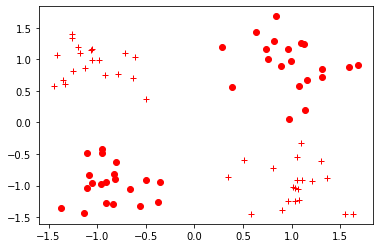

In [26]:
def vis_data(x,y = None, c = 'r'):
  if y is None:
    y = [None] * len(x)
  for x_,y_ in zip(x,y):
    if y_ is None:
      plt.plot(x_[0], x_[1], '*', markerfacecolor='none', markerredgecolor=c)
    else:
      plt.plot(x_[0],x_[1], c+'o' if y_== 0 else c+'+')

plt.figure()
vis_data(x_train,y_train, c='r')
plt.show()

In [27]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [28]:
class NeuralNet(torch.nn.Module):
  def __init__(self, input_size, hidden_size):
    super(NeuralNet, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
    self.relu = torch.nn.ReLU()
    self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
    self.sigmoid = torch.nn.Sigmoid()

  def forward(self, input_tensor):
    linear1 = self.linear_1(input_tensor)
    relu = self.relu(linear1)
    linear2 = self.linear_2(relu)
    output = self.sigmoid(linear2)
    return output    

In [29]:
model = NeuralNet(2,5)
learning_rate = 0.03
criterion = torch.nn.BCELoss()

In [30]:
epochs = 2000
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [31]:
model.eval()
test_loss_before = criterion(model(x_test).squeeze(), y_test)
print('Befor Training, test loss is {}'.format(test_loss_before.item()))

Befor Training, test loss is 0.7594480514526367


In [37]:
for epoch in range(epochs+1):
  model.train()
  optimizer.zero_grad()
  train_output = model(x_train)
  train_loss = criterion(train_output.squeeze(), y_train)
  if epoch % 100 ==0:
    print('Train loss at {} is in {}'.format(epoch,train_loss.item()))
  train_loss.backward() # 역전파 실행
  optimizer.step()

Train loss at 0 is in 0.07864423096179962
Train loss at 100 is in 0.07415580004453659
Train loss at 200 is in 0.07013420760631561
Train loss at 300 is in 0.06650946289300919
Train loss at 400 is in 0.063228540122509
Train loss at 500 is in 0.06024594232439995
Train loss at 600 is in 0.05752098560333252
Train loss at 700 is in 0.055021584033966064
Train loss at 800 is in 0.05272042006254196
Train loss at 900 is in 0.050595395267009735
Train loss at 1000 is in 0.04862735792994499
Train loss at 1100 is in 0.04679911956191063
Train loss at 1200 is in 0.045096516609191895
Train loss at 1300 is in 0.043506450951099396
Train loss at 1400 is in 0.04201792925596237
Train loss at 1500 is in 0.04062168672680855
Train loss at 1600 is in 0.039308588951826096
Train loss at 1700 is in 0.03807178512215614
Train loss at 1800 is in 0.0369042232632637
Train loss at 1900 is in 0.0358007438480854
Train loss at 2000 is in 0.034756138920784


In [38]:
model.eval()
test_loss =  criterion(torch.squeeze(model(x_test)),y_test)
print('After Training, test loss is {}'.format(test_loss.item()))

After Training, test loss is 0.030092433094978333


In [39]:
torch.save(model.state_dict(), './model.pt')

In [40]:
print('state_dict format of the model : {}'.format(model.state_dict()))

state_dict format of the model : OrderedDict([('linear_1.weight', tensor([[-1.9520, -1.7710],
        [-1.7756,  0.8715],
        [ 1.0848, -2.4715],
        [-1.8095,  0.8799],
        [ 0.2126,  0.3199]])), ('linear_1.bias', tensor([-0.3090, -0.1464, -0.2238, -0.1394, -0.6623])), ('linear_2.weight', tensor([[-2.4848,  1.8106,  2.6342,  2.0011,  0.0242]])), ('linear_2.bias', tensor([-2.8830]))])


In [41]:
new_model = NeuralNet(2,5)
new_model.load_state_dict(torch.load('./model.pt'))

<All keys matched successfully>

In [42]:
new_model.eval()
print('vector [-1,1] {}'.format(new_model(torch.FloatTensor([-1,1])).item()))

vector [-1,1] 0.9988277554512024
